In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
non_seasonal_adj_data = pd.read_excel('SPCS20RNSA.xlsx', sheet_name='Monthly')
seasonal_adj_data = pd.read_excel('SPCS20RSA.xlsx', sheet_name='Monthly')

seasonal_adj_data.set_index('observation_date', inplace=True)
seasonal_adj_data.head()

,SPCS20RSA
observation_date,
2000-01-01,100.589697
2000-02-01,101.692479
2000-03-01,102.783828
2000-04-01,103.996444
2000-05-01,105.252818


In [3]:
non_seasonal_adj_data.set_index('observation_date', inplace=True)
non_seasonal_adj_data.head()

,SPCS20RNSA
observation_date,
2000-01-01,100.000000
2000-02-01,100.757407
2000-03-01,101.945281
2000-04-01,103.501369
2000-05-01,105.197072


In [4]:
sa_col = seasonal_adj_data.columns[0]
nsa_col = non_seasonal_adj_data.columns[0]

seasonal_adj_data['growth_rate'] = np.log(seasonal_adj_data[sa_col]).diff()
non_seasonal_adj_data['growth_rate'] = np.log(non_seasonal_adj_data[nsa_col]).diff()

print("Seasonally Adjusted Growth Rates:")
print(seasonal_adj_data.head(3))

Seasonally Adjusted Growth Rates:
                   SPCS20RSA  growth_rate
observation_date                         
2000-01-01        100.589697          NaN
2000-02-01        101.692479     0.010904
2000-03-01        102.783828     0.010675


In [5]:
print("\nNon-Seasonally Adjusted Growth Rates:")
print(non_seasonal_adj_data.head(3))


Non-Seasonally Adjusted Growth Rates:
                  SPCS20RNSA  growth_rate
observation_date                         
2000-01-01        100.000000          NaN
2000-02-01        100.757407     0.007546
2000-03-01        101.945281     0.011720


# 2a

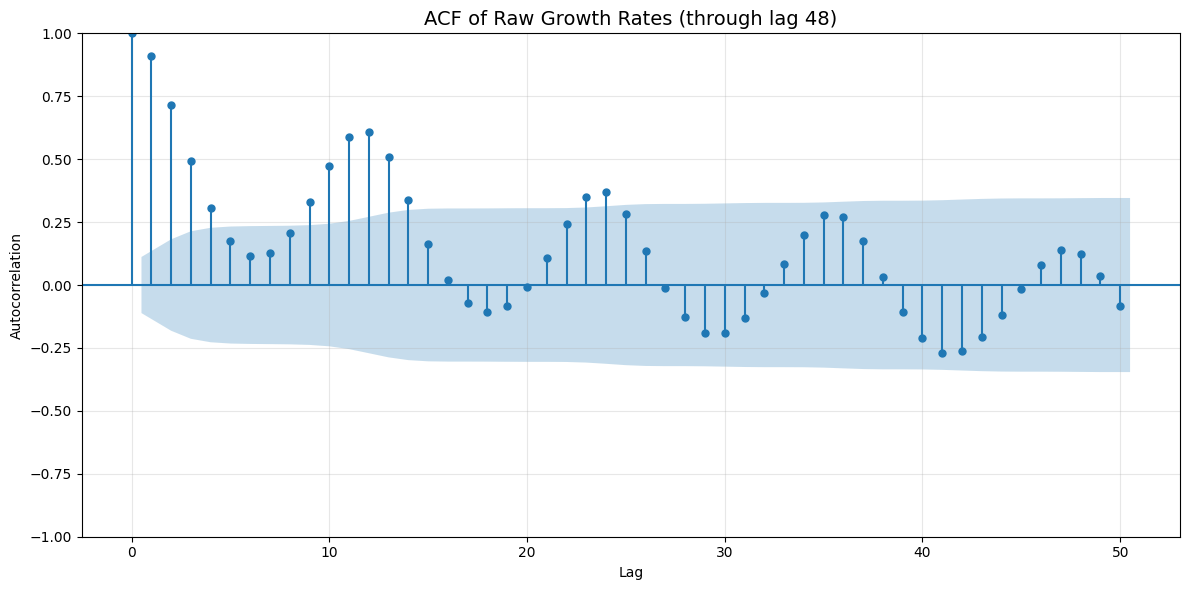

0.9088453278215556
0.7138915839076087
0.4939705063972834
0.30569484350443427
0.17529161167804858
0.11528531467879759
0.12919635106358748
0.20705935957760094
0.3290828831320723
ACF at lag 1: 0.9088
ACF at lag 12: 0.6081
ACF at lag 24: 0.3707
ACF at lag 36: 0.2709
ACF at lag 48: 0.1228


In [6]:
# Switch between two datasets
raw_growth_rates = non_seasonal_adj_data['growth_rate'].dropna()
# raw_growth_rates = seasonal_adj_data['growth_rate'].dropna()

# Calculate ACF 
acf_values = acf(raw_growth_rates, nlags=48, fft=False)

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(raw_growth_rates, lags=50, alpha=0.05, ax=plt.gca())
plt.title('ACF of Raw Growth Rates (through lag 48)', fontsize=14)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

for x in range(1, 10):
    print(acf_values[x])

print(f"ACF at lag 1: {acf_values[1]:.4f}")
# print(f"ACF at lag 2: {acf_values[2]:.4f}")
# print(f"ACF at lag 3: {acf_values[3]:.4f}")
print(f"ACF at lag 12: {acf_values[12]:.4f}")
print(f"ACF at lag 24: {acf_values[24]:.4f}")
print(f"ACF at lag 36: {acf_values[36]:.4f}")
print(f"ACF at lag 48: {acf_values[48]:.4f}")

Non-seasonally adjusted data:
- Seasonal spikes at lags 12, 24, 36, 48: autocorrelations are elevated at multiples of 12

Seasonally adjusted data:
- The spikes at lags 12, 24, 36, 48 are removed or much smaller


The slow decay pattern (especially in the seasonally adjusted series) suggests the growth rates may be non-stationary

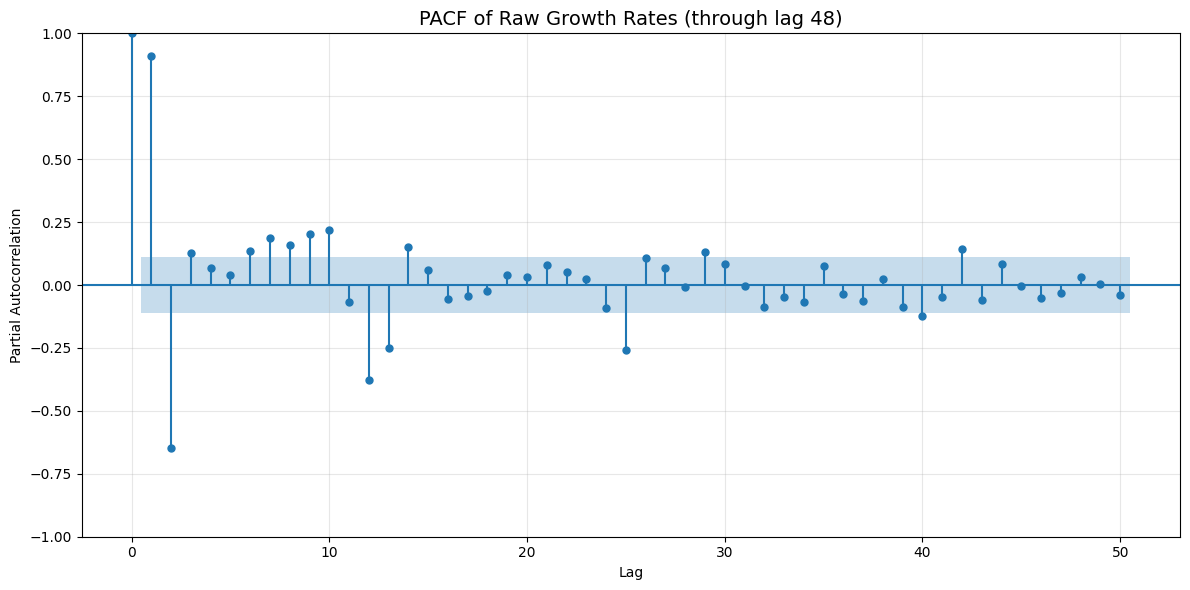

0.9103139603789323
-0.6463545875515581
0.12906682962027757
0.06942522027683679
0.03786904825094426
0.13583207402533917
0.18533826196993833
0.1595819534958215
0.20420608981801114
PACF at lag 1: 0.9103
PACF at lag 12: -0.3759
PACF at lag 24: -0.0910
PACF at lag 36: -0.0373
PACF at lag 48: 0.0336


In [8]:
# Switch between two datasets
raw_growth_rates = non_seasonal_adj_data['growth_rate'].dropna()
# raw_growth_rates = seasonal_adj_data['growth_rate'].dropna()

# Calculate PACF 
pacf_values = pacf(raw_growth_rates, nlags=48, method='ols')

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(raw_growth_rates, lags=50, alpha=0.05, ax=plt.gca(), method='ols')
plt.title('PACF of Raw Growth Rates (through lag 48)', fontsize=14)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

for x in range(1, 10):
    print(pacf_values[x])

print(f"PACF at lag 1: {pacf_values[1]:.4f}")
# print(f"PACF at lag 2: {pacf_values[2]:.4f}")
# print(f"PACF at lag 3: {pacf_values[3]:.4f}")
print(f"PACF at lag 12: {pacf_values[12]:.4f}")
print(f"PACF at lag 24: {pacf_values[24]:.4f}")
print(f"PACF at lag 36: {pacf_values[36]:.4f}")
print(f"PACF at lag 48: {pacf_values[48]:.4f}")

# 2b

No, an AR(1) model is not appropriate for the raw (non-seasonally adjusted) growth rates as seasonal spikes violate AR(1) structure. 

# 2c

Seasonally adjusted data still has a decay associated with it which creates issues for an AR(1) model. This points to potential non-stationarity.

# 2d

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = seasonal_adj_data['growth_rate'].dropna()

# Fit AR(1) model
ar1_model = AutoReg(data, lags=1, trend='c')
ar1_results = ar1_model.fit()

/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


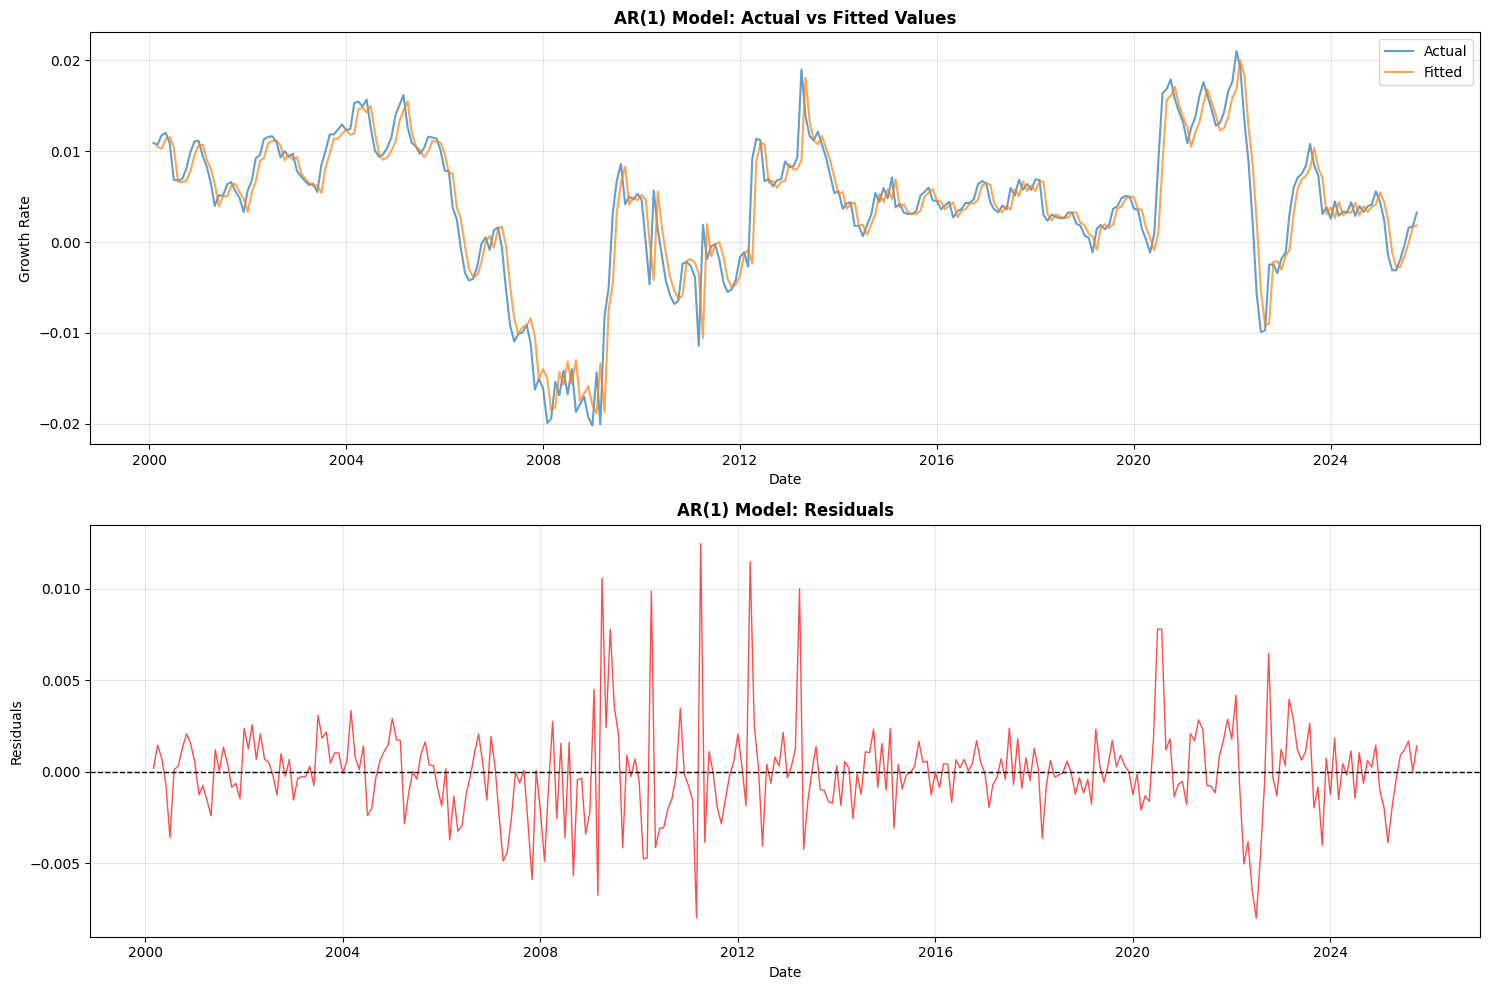

In [ ]:
# Get fitted values and residuals
fitted_values = ar1_results.fittedvalues
residuals = ar1_results.resid

# Create comprehensive plots
fig, axes = plt.subplots(2, figsize=(15, 10))

# Plot 1: Actual vs Fitted values
axes[0].plot(data.index, data.values, label='Actual', alpha=0.7, linewidth=1.5)
axes[0].plot(fitted_values.index, fitted_values.values, label='Fitted', alpha=0.7, linewidth=1.5)
axes[0].set_title('AR(1) Model: Actual vs Fitted Values', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Growth Rate')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals over time
axes[1].plot(residuals.index, residuals.values, color='red', alpha=0.7, linewidth=1)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('AR(1) Model: Residuals', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Residuals')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2e

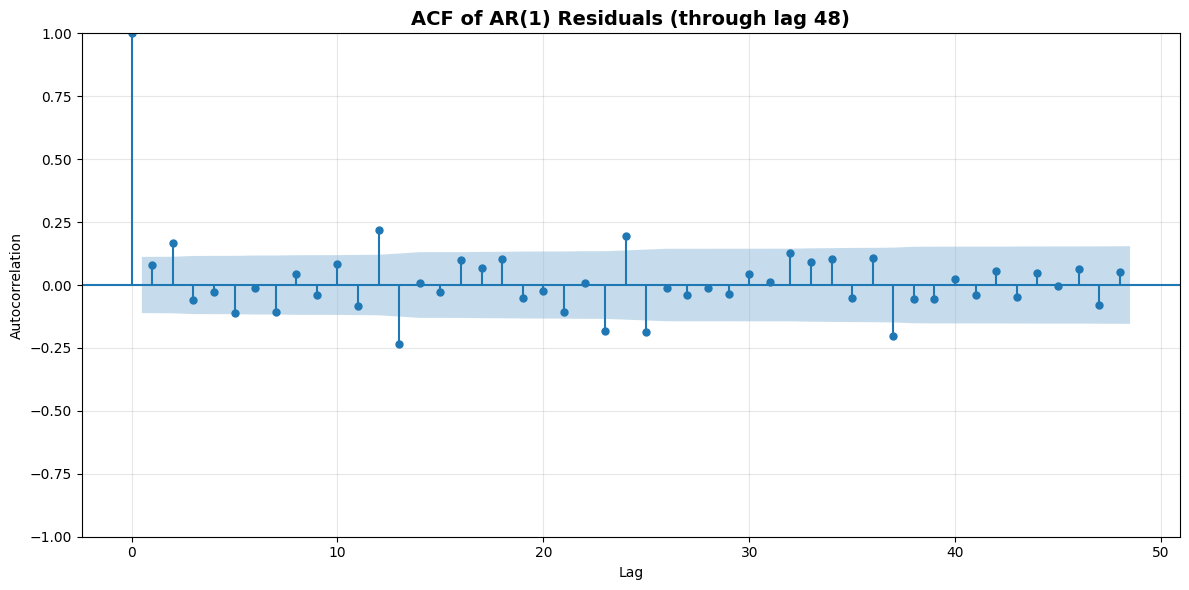

Residual Autocorrelations:
Lag 0:  1.0000
Lag 1:  0.0791
Lag 2:  0.1683
Lag 3:  -0.0578
Lag 4:  -0.0286
Lag 5:  -0.1126
Lag 6:  -0.0111
Lag 7:  -0.1064
Lag 8:  0.0425
Lag 9:  -0.0407
Lag 10:  0.0849
Lag 11:  -0.0852
Lag 12:  0.2201
Lag 13:  -0.2341
Lag 14:  0.0078
Lag 15:  -0.0281
Lag 16:  0.0993
Lag 17:  0.0686
Lag 18:  0.1017
Lag 19:  -0.0521


In [ ]:
# Get residuals from the fitted AR(1) model
residuals = ar1_results.resid

# 1. Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=48, alpha=0.05, ax=plt.gca())
plt.title('ACF of AR(1) Residuals (through lag 48)', fontsize=14, fontweight='bold')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Calculate ACF values for specific lags
residual_acf = acf(residuals, nlags=48, fft=False)
print("Residual Autocorrelations:")
for i in range(20):
    print(f"Lag {i}:  {residual_acf[i]:.4f}")

# 2f

No. The AR(1) model does not fully fit the data. Evidence from residual autocorrelations at lag 2 = 0.1683

# 2g

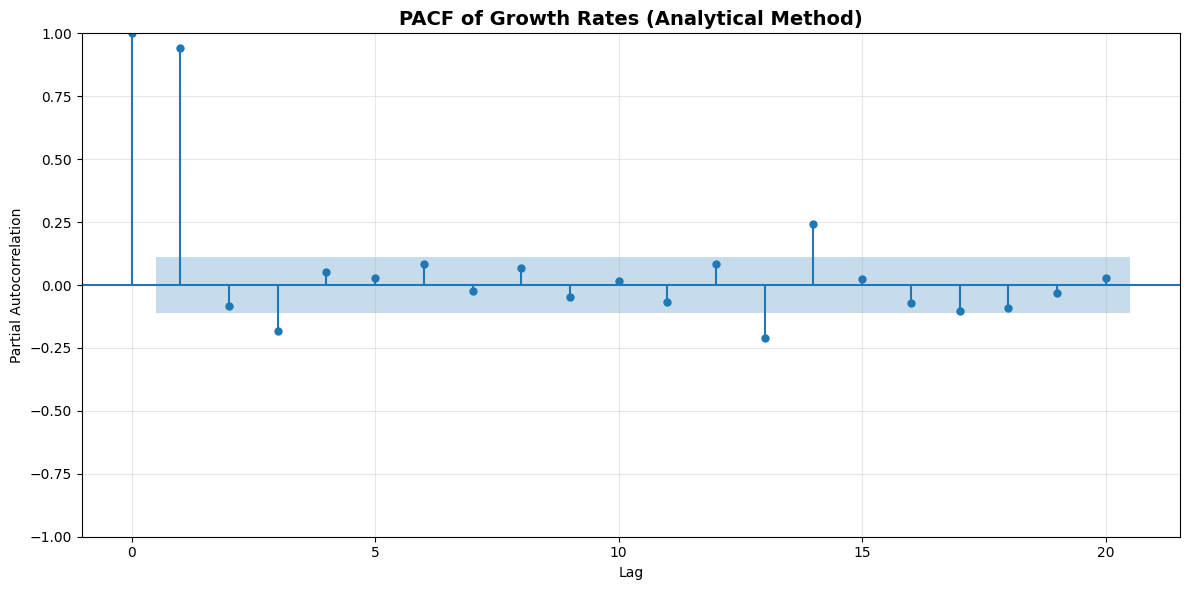

In [ ]:
from statsmodels.tsa.stattools import pacf, pacf_yw
from statsmodels.graphics.tsaplots import plot_pacf

data = seasonal_adj_data['growth_rate'].dropna()

# Calculate PACF analytically
pacf_values = pacf(data, nlags=20, method='ywm')  # Yule-Walker method

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(data, lags=20, alpha=0.05, ax=plt.gca(), method='ywm')
plt.title('PACF of Growth Rates (Analytical Method)', fontsize=14, fontweight='bold')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# for i in range(1, min(21, len(pacf_values))):
#     significance = "***" if abs(pacf_values[i]) > 1.96/np.sqrt(len(data)) else ""
#     print(f"Lag {i:2d}: {pacf_values[i]:7.4f} {significance}")

AR(1) or AR(14) would work best.

# 2h

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Get the data
data = seasonal_adj_data['growth_rate'].dropna()

# Fit AR(14) model
ar14_model = AutoReg(data, lags=14, trend='c')
ar14_results = ar14_model.fit()

/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


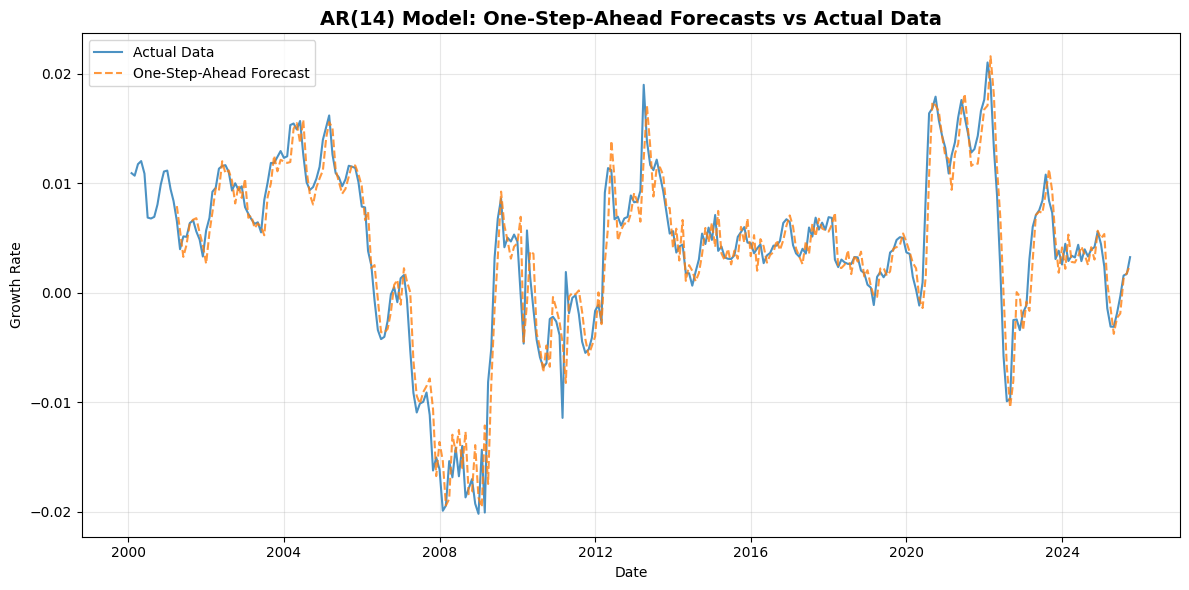

In [ ]:
# Get one-step-ahead forecasts (fitted values)
forecasts = ar14_results.fittedvalues

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, label='Actual Data', linewidth=1.5, alpha=0.8)
plt.plot(forecasts.index, forecasts.values, label='One-Step-Ahead Forecast', linewidth=1.5, alpha=0.8, linestyle='--')
plt.title('AR(14) Model: One-Step-Ahead Forecasts vs Actual Data', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2i

In [ ]:
# One-step-ahead out-of-sample forecast (T+1)
forecast_value = ar14_results.forecast(steps=1)

# Get the standard error of the forecast
# For AR models, we need the residual standard error
residual_std = np.sqrt(ar14_results.sigma2)

# Calculate 95% prediction interval
from scipy import stats
z_critical = stats.norm.ppf(0.975)  # 1.96 for 95% interval

lower_bound = forecast_value[0] - z_critical * residual_std
upper_bound = forecast_value[0] + z_critical * residual_std

print("One-Step-Ahead Out-of-Sample Forecast (T+1):")
print(f"Forecast: {forecast_value[0]:.6f}")
print(f"Residual Standard Error: {residual_std:.6f}")
print(f"\n95% Prediction Interval:")
print(f"Lower bound: {lower_bound:.6f}")
print(f"Upper bound: {upper_bound:.6f}")
print(f"Interval width: {upper_bound - lower_bound:.6f}")

One-Step-Ahead Out-of-Sample Forecast (T+1):
Forecast: 0.003137
Residual Standard Error: 0.002382

95% Prediction Interval:
Lower bound: -0.001533
Upper bound: 0.007806
Interval width: 0.009339


/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/var/folders/x3/2h269p1576s293vgwkccn0zm0000gn/T/ipykernel_31082/4186325272.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_bound = forecast_value[0] - z_critical * residual_std
/var/folders/x3/2h269p1576s293vgwkccn0zm0000gn/T/ipykernel_31082/4186325272.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be t